# Model Predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the model

In [3]:
model = load_model('multiclass_best.h5')

## Prediction on unseen images

In [4]:
from keras.preprocessing import image
# file path
mask_file = 'Face Mask Dataset multiclass/Test/WithMask/190.png'
nomask_file = 'Face Mask Dataset multiclass/Test/WithoutMask/84.png'
inmask_file = 'Face Mask Dataset multiclass/Test/IncorrectMask/05717_Mask_Mouth_Chin.jpg'
test_mask_img = 'test_img/test_mask _1.jpg'
test_nomask_img = 'test_img/test_nomask_1.jpeg'
test_inmask_img = 'test_img/inmask_1.png'

0: Incorrect mask <br>
1: with mask <br>
2: without mask

In [5]:
def mask_detector(file, model):
    """
    The function returns the prediction of mask.
    
    parameters: 
        file: image file path 
        model: mask detector model
    
    output: 
        prediction: if the person has mask or not
        show image
    """
    img = image.load_img(file, target_size=(150,150))
    new_img = image.img_to_array(img)
    new_img = np.expand_dims(new_img, axis=0)
    new_img = new_img/255
    
    labels = {0:"Incorrect Mask", 1: "Mask", 2:"No Mask"}
    prediction_class = model.predict_classes(new_img)[0]
    prediction = labels[prediction_class]
    
    print(f'the person has {prediction}')
    plt.imshow(img)

### images in test set

the person has Mask


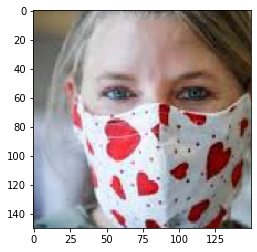

In [6]:
mask_detector(mask_file, model)

the person has No Mask


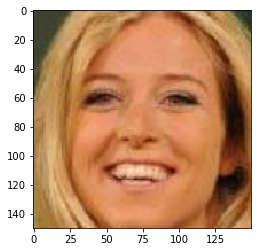

In [7]:
mask_detector(nomask_file, model)

the person has Incorrect Mask


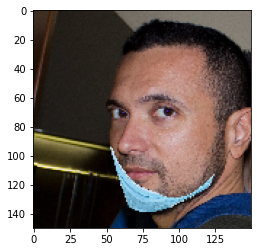

In [8]:
mask_detector(inmask_file, model)

All good on test set!

### new images outside of test set

the person has Mask


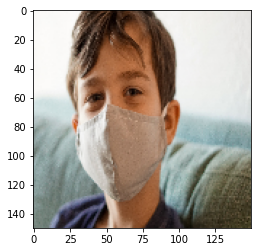

In [9]:
mask_detector(test_mask_img, model)

the person has No Mask


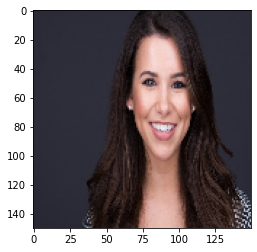

In [10]:
mask_detector(test_nomask_img, model)

the person has Mask


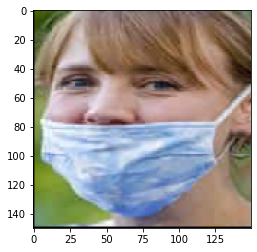

In [11]:
mask_detector(test_inmask_img, model)

Getting an error here. try another

the person has Mask


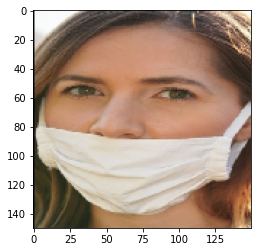

In [12]:
mask_detector("test_img/inmask_2.png", model)

still getting an error. try another more incorrect mask

the person has Mask


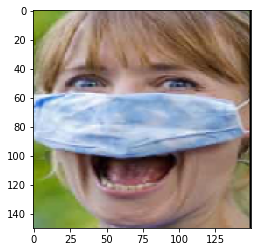

In [13]:
mask_detector("test_img/inmask_4.png", model)

Still getting the error. Try images for other categories.

the person has Mask


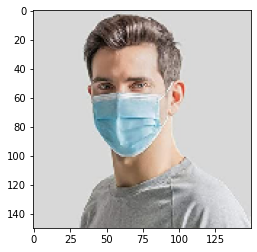

In [14]:
mask_detector("test_img/test_mask_2.jpg", model)

the person has No Mask


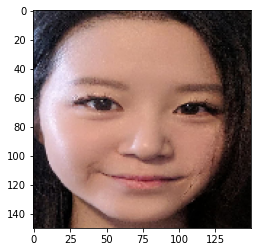

In [15]:
mask_detector("test_img/test_nomask_3.png", model)

The other categories predictions are good. But the incorrect mask detection is off with new raw images. <br>
After looking into the dataset for incorrect mask, I realized that since they're all "generated" incorrect mask images (masks are add on existing images) the model might think that's the reason why it's its own category. <br>
I will try bring in some generated correct mask images for "WithMask" category to offset that assumption. 